In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Iris.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "saurabh00007/iriscsv",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-2347563554.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 4.99k/4.99k [00:00<00:00, 455kB/s]

First 5 records:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Check the Data

In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print(df.describe())
print(df['Species'].value_counts())


Shape: (150, 6)
Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000   

#  Data Observation:

The dataset contains 150 rows and 6 columns.

Features include: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and the target variable Species.

All columns have complete data (no missing values).

Four columns are numerical (float), one is integer, and the target column Species is categorical.

The numerical features vary within realistic ranges for flower measurements.

The dataset is balanced, with each species (Iris-setosa, Iris-versicolor, Iris-virginica) having 50 samples

#

Mean Squared Error: 5.515151515151515
R² Score: 0.33149678604224064


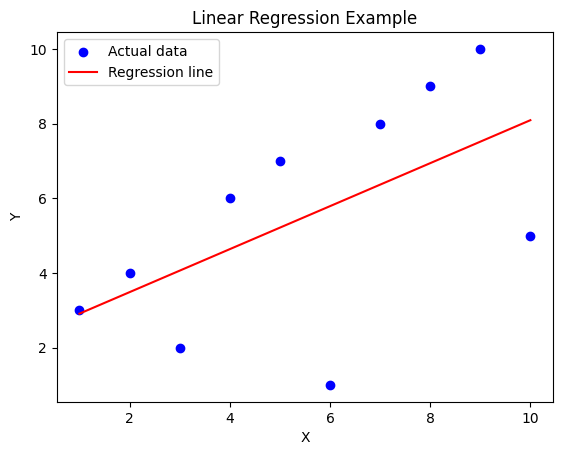

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([3,4,2,6,7,1,8,9,10,5])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()

# Correlation heatmap

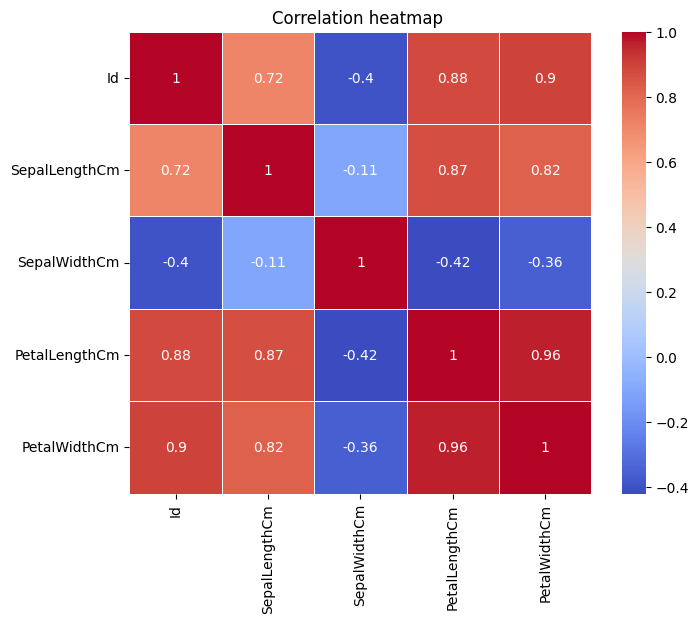

In [6]:
plt.figure(figsize=(8,6))

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar=True
)
plt.title("Correlation heatmap ")
plt.show()

# dropOut--> ID Column

In [7]:
df = df.drop('Id', axis=1)

X = df.drop('Species', axis=1)
y = df['Species']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# Split The Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



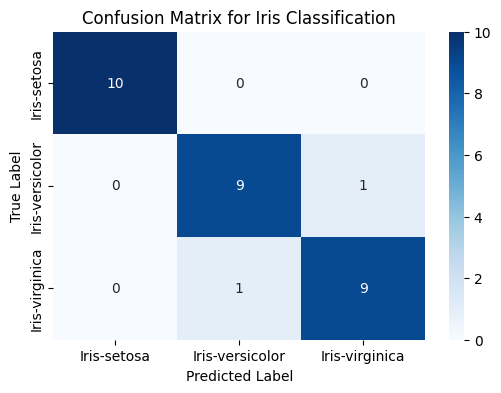

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

labels = le.classes_

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix for Iris Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Random Forest algorithm

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Accuracy: 90.0 %

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



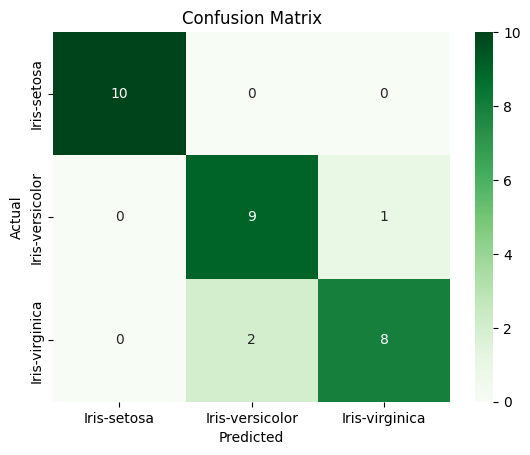

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(" Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


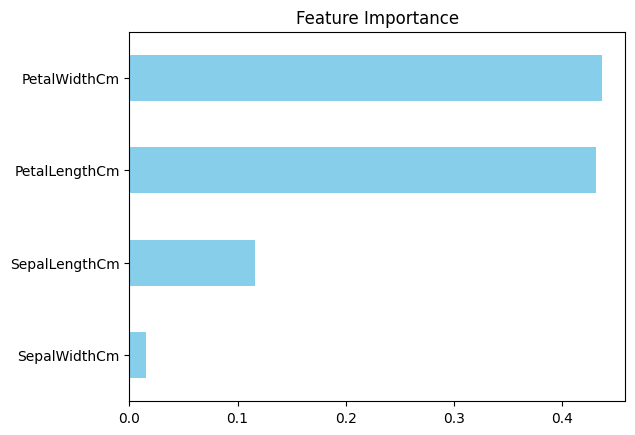

In [14]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.show()


# Compare multiple ML algorithms on the Iris dataset

===== KNN =====
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy on Test Set: 0.9333333333333333
===== SVM =====
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on Test Set: 0.9333333333333333
===== Decision Tree =====
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy on Test Set: 0.9


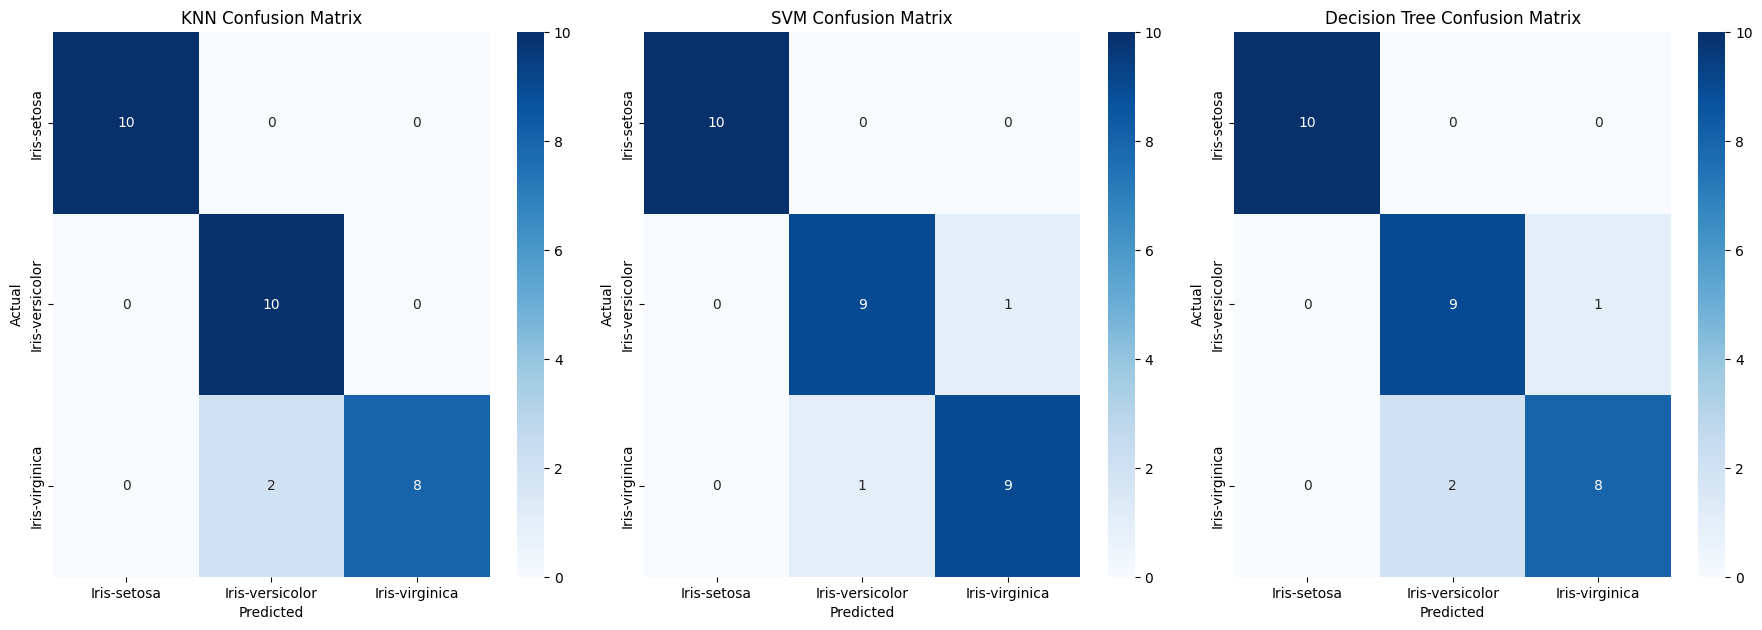

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


param_grids = {
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'max_depth': [None, 3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
}

# Define the models to be used
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    print(f"===== {name} =====")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print("Best Parameters:", grid.best_params_)
    print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_,
                ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

if len(models) < len(axes):
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# prediction

In [16]:
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [6.2, 3.4, 5.4, 2.3],
    [5.9, 3.0, 4.2, 1.5]
])

new_samples_scaled = scaler.transform(new_samples)

predictions = best_model.predict(new_samples_scaled)
predicted_classes = le.inverse_transform(predictions)

for i, cls in enumerate(predicted_classes):
    print(f"Sample {i+1}: Predicted class = {cls}")

Sample 1: Predicted class = Iris-setosa
Sample 2: Predicted class = Iris-virginica
Sample 3: Predicted class = Iris-versicolor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Save model

In [17]:
import joblib

joblib.dump(model, "iris_model.pkl")

print("Model saved successfully!")


Model saved successfully!
